# Loading dataset

In [1]:
%plot inline

In [2]:
!cat ../data/winequality.names

Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 016

In [3]:
!head ../data/winequality-red.csv

"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;9.8;5
11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58;9.8;6
7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
7.4;0.66;0;1.8;0.075;13;40;0.9978;3.51;0.56;9.4;5
7.9;0.6;0.06;1.6;0.069;15;59;0.9964;3.3;0.46;9.4;5
7.3;0.65;0;1.2;0.065;15;21;0.9946;3.39;0.47;10;7
7.8;0.58;0.02;2;0.073;9;18;0.9968;3.36;0.57;9.5;7


In [4]:
data = dlmread("../data/winequality-red.csv", ";" ,1, 0); % skip feature names
size(data)

ans =

   1599     12



# Preparing data

In [5]:
% randomize order of data for excluding biases in the dataset
n = rand(length(data),1);
[_ index] = sort(n);
data_rand = data(index, :);

In [6]:
data_norm = [];
mu = [];
sigma = [];

% normalizing data for optimum use of algorithms
for j = 1:size(data_rand,2),
    mu = [mu; mean(data_rand(:,j))];
    sigma = [sigma; std(data_rand(:,j))];
    data_norm = [data_norm, (data_rand(:,j)- mu(j)*ones(size(data,1),1))/sigma(j)];
end

cor =

 Columns 1 through 6:

   1.0000000  -0.2561309   0.6717034   0.1147767   0.0937052  -0.1537942
  -0.2561309   1.0000000  -0.5524957   0.0019179   0.0612978  -0.0105038
   0.6717034  -0.5524957   1.0000000   0.1435772   0.2038229  -0.0609781
   0.1147767   0.0019179   0.1435772   1.0000000   0.0556095   0.1870490
   0.0937052   0.0612978   0.2038229   0.0556095   1.0000000   0.0055621
  -0.1537942  -0.0105038  -0.0609781   0.1870490   0.0055621   1.0000000
  -0.1131814   0.0764700   0.0355330   0.2030279   0.0474005   0.6676665
   0.6680473   0.0220262   0.3649472   0.3552834   0.2006323  -0.0219458
  -0.6829782   0.2349373  -0.5419041  -0.0856524  -0.2650261   0.0703775
   0.1830057  -0.2609867   0.3127700   0.0055271   0.3712605   0.0516576
  -0.0616683  -0.2022880   0.1099032   0.0420754  -0.2211405  -0.0694084
   0.1240516  -0.3905578   0.2263725   0.0137316  -0.1289066  -0.0506561

 Columns 7 through 12:

  -0.1131814   0.6680473  -0.6829782   0.1830057  -0.0616683   0.1240

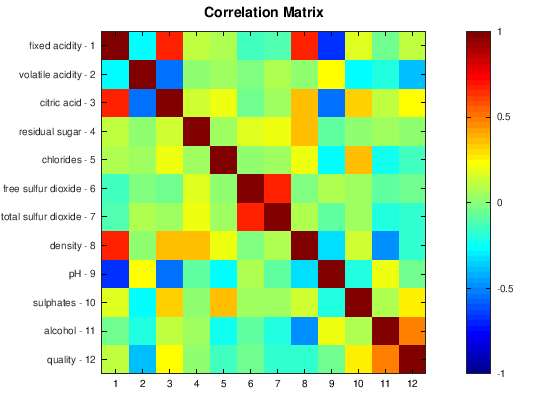

In [7]:
% correlation matrix
cor = corr(data_norm)

imagesc(cor);

set(gca, 'XTick', 1:size(cor,2)); % center x-axis ticks on bins
set(gca, 'YTick', 1:size(cor,2)); % center y-axis ticks on bins
set(gca, 'YTickLabel', ["fixed acidity - 1";"volatile acidity - 2";"citric acid - 3";"residual sugar - 4";
                        "chlorides - 5";"free sulfur dioxide - 6";"total sulfur dioxide - 7";"density - 8";
                        "pH - 9";"sulphates - 10";"alcohol - 11";"quality - 12"]); % set y-axis labels
                        
title('Correlation Matrix', 'FontSize', 14); % set title

caxis([-1, 1]);  % colorbar ranging from -1 to 1
colormap('jet'); % set the colorscheme
colorbar;        % enable colorbar

# Separating into training and testing set

In [8]:
X = data_norm(:,1:11); % inputs
y = data_norm(:, 12);  % labels

In [9]:
X_train = X(1:1119, :); % 70% for training
y_train = y(1:1119);

X_test = X(1120:1599, :);  % 30% for testing
y_test = y(1120:1599);

# ANN Architecture

![Diagram](../Diagram.png)

In [10]:
% M number of labeled inputs
% N number of features (lenght of input vector)
[M, N] = size(X_train)

M =  1119
N =  11


In [11]:
O = 8 % number of neurons in the hidden layer

O =  8


In [12]:
% initial weights matrix as small random values
W = rand([O N]).*0.01; % W: OxN

In [13]:
% adding column for bias
X_train_bias = [ones(size(X_train,1),1), X_train]'; % X_train_bias: MxN+1
X_test_bias = [ones(size(X_test,1),1), X_test]';
W_bias = [ones(size(W,1),1), W]; % W_bias: N+1xO

## ANN evaluation function:

Feedfoward output:


$ \mathbf{u} = \mathbf{Wx} $  
$ \mathbf{a} = f(\mathbf{u}) = \tanh(\mathbf{u})$  
$ y = \sum \mathbf{a}$

$$
    y = \sum \tanh{(\mathbf{Wx})}
$$

# Learning

## Backpropagation


Gradient descent for minimizing error function J:

$$
\mathbf{W^{N+1}} = \mathbf{W^N} - \alpha \nabla{J} =  \mathbf{W^N} - \alpha \frac{\partial{J}}{\partial{\mathbf{W}}}
$$

Definig error function as squared error:

$$
J = e^2 = (s-y)^2
$$

Chain rule for finding gradient of J:

$$
\frac{\partial{J}}{\partial{\mathbf{W}}} = \frac{\partial{J}}{\partial{e}} \frac{\partial{e}}{\partial{y}} \frac{\partial{y}}{\partial{\mathbf{a}}} \frac{\partial{\mathbf{a}}}{\partial{\mathbf{u}}} \frac{\partial{\mathbf{u}}}{\partial{\mathbf{W}}} = 2 (s - y) (-1) (1) \mathbf{\dot{F}(u)} \mathbf{x} = \boldsymbol{\delta} \mathbf {x}
$$

Where the array $\mathbf{\dot{F}(u)}$ is defined as:

$$
\mathbf{\dot{F}(u)} = 
\begin{bmatrix}
  \dot{f}(u_1) & 0 & \cdots  & 0 \\
  0 & \dot{f}(u_2) & \cdots  & 0 \\
  \vdots   & \vdots & \ddots & \vdots \\
  0 & 0 & \cdots  & \dot{f}(u_O) \\
\end{bmatrix}
$$

and:

$\dot{f}(u) = \frac{d \tanh(u)}{du} = sech^2(u)$

Error metric:

$$
MSE = \frac{1}{M}\sum_M e^2 = \frac{1}{M}\sum_M (s - y)^2
$$

In [14]:
function Delta = get_delta(u, e),
    F_prime = zeros(size(u,2), size(u,2));
    for i = 1:size(u,2),
        for j = 1:size(u,2),
            if i==j,
                F_prime(i,j) = (sech(u(1)))^2; % F: OxO
            end
        end
    end
    
    Delta = -2*F_prime*e; % delta: OxO
    
end

In [15]:
function [W, MSE] = backprop_batch_step(X, s, W, alpha),

    [M, N] = size(X);
    
    aux = zeros(size(W));
    E = [];
    
    for i = 1:M,
        % feedfoward
        u = X(:,i)'*W';      % u: 1xO
        a = tanh(u);         % output of hidden layer a: 1xO
        y = sum(a);          % y: 1x1

        e = s(i) - y;
        
        E = [E; e]; % E: Mx1
        
        Delta = get_delta(u, e);           % Delta: OxO
        Xv = ones(size(Delta), 1)*X(:,i)'; % Xv: OxN
        aux = aux + Delta*Xv;              % aux: OxN
    end

    aux = aux/M;
                              
    W = W - alpha.*aux; 

    % metric
    MSE = (E'*E)/M;
end

In [16]:
function [W, mse_train_vec, mse_test_vec] = batch_backpropagation (X_te, X_tr, y_te, y_tr, W, alpha, epsilon, gamma,
                                                                    show_steps, max_iter),
    mse_test_vec = [];
    mse_train_vec = [];
    mse_test = epsilon+1;
    mse_min = inf;
    counter = 0;
    iter = 0;
    
    % stop if passed gamma steps without improvement 
    % or if error is less than epsilon
    % or if it is the iteration number max_iter
    while counter < gamma && mse_test > epsilon && iter < max_iter,
        mse_before = mse_test;
        mse_test = 0;
        [_, mse_test] = backprop_batch_step(X_te, y_te, W, alpha);
        mse_test_vec = [mse_test_vec; mse_test];
        [W, mse_train] = backprop_batch_step(X_tr, y_tr, W, alpha);
        mse_train_vec = [mse_train_vec; mse_train];
        
        if mse_test > mse_min,
            counter = counter + 1;
        else,
            mse_min = mse_test;
            counter = 0;
        end
        
        iter = iter + 1;
        
        if show_steps,
            iter
            [mse_train, mse_test]
        end
    end
    
    iter_min = iter - counter
    mse_min
    
end

In [17]:
# hyperparameters
epsilon = 0.1;
alpha = 0.006;
gamma = 50;
max_iter = 20000;

In [18]:
% backpropagation for number of hidden neurons as defined above in ANN architecture
[W_out, mse_train_vec, mse_test_vec] = batch_backpropagation(X_test_bias, X_train_bias, y_test, y_train, W_bias, alpha, epsilon, gamma, 1, max_iter);

iter =  1
ans =

   40.812   35.598

iter =  2
ans =

   38.861   34.796

iter =  3
ans =

   36.703   33.921

iter =  4
ans =

   34.334   32.968

iter =  5
ans =

   31.772   31.941

iter =  6
ans =

   29.059   30.850

iter =  7
ans =

   26.275   29.716

iter =  8
ans =

   23.520   28.571

iter =  9
ans =

   20.898   27.449

iter =  10
ans =

   18.485   26.376

iter =  11
ans =

   16.318   25.365

iter =  12
ans =

   14.405   24.418

iter =  13
ans =

   12.735   23.530

iter =  14
ans =

   11.290   22.692

iter =  15
ans =

   10.046   21.900

iter =  16
ans =

    8.9775   21.1502

iter =  17
ans =

    8.0590   20.4390

iter =  18
ans =

    7.2654   19.7650

iter =  19
ans =

    6.5748   19.1268

iter =  20
ans =

    5.9684   18.5235

iter =  21
ans =

    5.4315   17.9544

iter =  22
ans =

    4.9526   17.4191

iter =  23
ans =

    4.5229   16.9170

iter =  24
ans =

    4.1359   16.4479

iter =  25
ans =

    3.7866   16.0112

iter =  26
ans =

    3.4709   15.6061


ans =

   0.064404   4.009423

iter =  201
ans =

   0.064209   4.002357

iter =  202
ans =

   0.064018   3.995376

iter =  203
ans =

   0.063830   3.988478

iter =  204
ans =

   0.063645   3.981662

iter =  205
ans =

   0.063463   3.974925

iter =  206
ans =

   0.063284   3.968265

iter =  207
ans =

   0.063108   3.961680

iter =  208
ans =

   0.062935   3.955170

iter =  209
ans =

   0.062764   3.948732

iter =  210
ans =

   0.062596   3.942365

iter =  211
ans =

   0.062431   3.936066

iter =  212
ans =

   0.062268   3.929835

iter =  213
ans =

   0.062108   3.923670

iter =  214
ans =

   0.061950   3.917570

iter =  215
ans =

   0.061795   3.911532

iter =  216
ans =

   0.061642   3.905556

iter =  217
ans =

   0.061491   3.899640

iter =  218
ans =

   0.061342   3.893784

iter =  219
ans =

   0.061195   3.887984

iter =  220
ans =

   0.061051   3.882242

iter =  221
ans =

   0.060908   3.876554

iter =  222
ans =

   0.060767   3.870920

iter =  223
ans =

   0


iter =  391
ans =

   0.049340   3.242413

iter =  392
ans =

   0.049305   3.239485

iter =  393
ans =

   0.049269   3.236562

iter =  394
ans =

   0.049234   3.233643

iter =  395
ans =

   0.049198   3.230728

iter =  396
ans =

   0.049163   3.227818

iter =  397
ans =

   0.049129   3.224912

iter =  398
ans =

   0.049094   3.222011

iter =  399
ans =

   0.049059   3.219114

iter =  400
ans =

   0.049025   3.216221

iter =  401
ans =

   0.048990   3.213332

iter =  402
ans =

   0.048956   3.210447

iter =  403
ans =

   0.048922   3.207567

iter =  404
ans =

   0.048888   3.204691

iter =  405
ans =

   0.048855   3.201819

iter =  406
ans =

   0.048821   3.198952

iter =  407
ans =

   0.048788   3.196088

iter =  408
ans =

   0.048755   3.193228

iter =  409
ans =

   0.048721   3.190373

iter =  410
ans =

   0.048688   3.187522

iter =  411
ans =

   0.048656   3.184675

iter =  412
ans =

   0.048623   3.181831

iter =  413
ans =

   0.048590   3.178992

iter =  41


iter =  582
ans =

   0.044363   2.750072

iter =  583
ans =

   0.044343   2.747810

iter =  584
ans =

   0.044323   2.745551

iter =  585
ans =

   0.044303   2.743296

iter =  586
ans =

   0.044283   2.741043

iter =  587
ans =

   0.044264   2.738794

iter =  588
ans =

   0.044244   2.736547

iter =  589
ans =

   0.044225   2.734304

iter =  590
ans =

   0.044205   2.732064

iter =  591
ans =

   0.044186   2.729826

iter =  592
ans =

   0.044166   2.727592

iter =  593
ans =

   0.044147   2.725360

iter =  594
ans =

   0.044127   2.723132

iter =  595
ans =

   0.044108   2.720907

iter =  596
ans =

   0.044089   2.718684

iter =  597
ans =

   0.044069   2.716465

iter =  598
ans =

   0.044050   2.714249

iter =  599
ans =

   0.044031   2.712035

iter =  600
ans =

   0.044012   2.709825

iter =  601
ans =

   0.043993   2.707618

iter =  602
ans =

   0.043974   2.705413

iter =  603
ans =

   0.043955   2.703212

iter =  604
ans =

   0.043936   2.701013

iter =  60


iter =  773
ans =

   0.041199   2.369377

iter =  774
ans =

   0.041186   2.367634

iter =  775
ans =

   0.041172   2.365893

iter =  776
ans =

   0.041158   2.364155

iter =  777
ans =

   0.041144   2.362418

iter =  778
ans =

   0.041130   2.360685

iter =  779
ans =

   0.041116   2.358953

iter =  780
ans =

   0.041103   2.357224

iter =  781
ans =

   0.041089   2.355497

iter =  782
ans =

   0.041075   2.353773

iter =  783
ans =

   0.041061   2.352051

iter =  784
ans =

   0.041048   2.350331

iter =  785
ans =

   0.041034   2.348614

iter =  786
ans =

   0.041020   2.346899

iter =  787
ans =

   0.041007   2.345186

iter =  788
ans =

   0.040993   2.343476

iter =  789
ans =

   0.040980   2.341768

iter =  790
ans =

   0.040966   2.340062

iter =  791
ans =

   0.040953   2.338359

iter =  792
ans =

   0.040939   2.336658

iter =  793
ans =

   0.040926   2.334959

iter =  794
ans =

   0.040912   2.333263

iter =  795
ans =

   0.040899   2.331568

iter =  79


iter =  964
ans =

   0.038888   2.075724

iter =  965
ans =

   0.038877   2.074375

iter =  966
ans =

   0.038866   2.073028

iter =  967
ans =

   0.038856   2.071683

iter =  968
ans =

   0.038845   2.070340

iter =  969
ans =

   0.038835   2.068999

iter =  970
ans =

   0.038824   2.067659

iter =  971
ans =

   0.038814   2.066321

iter =  972
ans =

   0.038803   2.064985

iter =  973
ans =

   0.038793   2.063650

iter =  974
ans =

   0.038782   2.062317

iter =  975
ans =

   0.038772   2.060986

iter =  976
ans =

   0.038762   2.059657

iter =  977
ans =

   0.038751   2.058330

iter =  978
ans =

   0.038741   2.057004

iter =  979
ans =

   0.038730   2.055680

iter =  980
ans =

   0.038720   2.054358

iter =  981
ans =

   0.038710   2.053037

iter =  982
ans =

   0.038699   2.051718

iter =  983
ans =

   0.038689   2.050401

iter =  984
ans =

   0.038679   2.049086

iter =  985
ans =

   0.038668   2.047773

iter =  986
ans =

   0.038658   2.046461

iter =  98

iter =  1151
ans =

   0.037108   1.851778

iter =  1152
ans =

   0.037099   1.850719

iter =  1153
ans =

   0.037091   1.849662

iter =  1154
ans =

   0.037082   1.848607

iter =  1155
ans =

   0.037073   1.847553

iter =  1156
ans =

   0.037065   1.846500

iter =  1157
ans =

   0.037056   1.845448

iter =  1158
ans =

   0.037048   1.844398

iter =  1159
ans =

   0.037039   1.843349

iter =  1160
ans =

   0.037031   1.842301

iter =  1161
ans =

   0.037022   1.841255

iter =  1162
ans =

   0.037014   1.840210

iter =  1163
ans =

   0.037005   1.839167

iter =  1164
ans =

   0.036997   1.838125

iter =  1165
ans =

   0.036988   1.837084

iter =  1166
ans =

   0.036980   1.836044

iter =  1167
ans =

   0.036971   1.835006

iter =  1168
ans =

   0.036963   1.833969

iter =  1169
ans =

   0.036954   1.832933

iter =  1170
ans =

   0.036946   1.831899

iter =  1171
ans =

   0.036937   1.830866

iter =  1172
ans =

   0.036929   1.829834

iter =  1173
ans =

   0.036920 

ans =

   0.035632   1.676347

iter =  1338
ans =

   0.035625   1.675512

iter =  1339
ans =

   0.035618   1.674677

iter =  1340
ans =

   0.035610   1.673843

iter =  1341
ans =

   0.035603   1.673010

iter =  1342
ans =

   0.035596   1.672179

iter =  1343
ans =

   0.035588   1.671348

iter =  1344
ans =

   0.035581   1.670518

iter =  1345
ans =

   0.035574   1.669690

iter =  1346
ans =

   0.035566   1.668862

iter =  1347
ans =

   0.035559   1.668036

iter =  1348
ans =

   0.035552   1.667211

iter =  1349
ans =

   0.035545   1.666386

iter =  1350
ans =

   0.035537   1.665563

iter =  1351
ans =

   0.035530   1.664741

iter =  1352
ans =

   0.035523   1.663920

iter =  1353
ans =

   0.035515   1.663100

iter =  1354
ans =

   0.035508   1.662281

iter =  1355
ans =

   0.035501   1.661462

iter =  1356
ans =

   0.035494   1.660645

iter =  1357
ans =

   0.035486   1.659829

iter =  1358
ans =

   0.035479   1.659015

iter =  1359
ans =

   0.035472   1.658201

i


iter =  1524
ans =

   0.034342   1.537197

iter =  1525
ans =

   0.034336   1.536539

iter =  1526
ans =

   0.034329   1.535883

iter =  1527
ans =

   0.034323   1.535227

iter =  1528
ans =

   0.034316   1.534572

iter =  1529
ans =

   0.034310   1.533918

iter =  1530
ans =

   0.034303   1.533264

iter =  1531
ans =

   0.034297   1.532612

iter =  1532
ans =

   0.034290   1.531960

iter =  1533
ans =

   0.034284   1.531310

iter =  1534
ans =

   0.034277   1.530660

iter =  1535
ans =

   0.034271   1.530011

iter =  1536
ans =

   0.034264   1.529363

iter =  1537
ans =

   0.034258   1.528715

iter =  1538
ans =

   0.034251   1.528069

iter =  1539
ans =

   0.034245   1.527423

iter =  1540
ans =

   0.034238   1.526778

iter =  1541
ans =

   0.034232   1.526135

iter =  1542
ans =

   0.034226   1.525491

iter =  1543
ans =

   0.034219   1.524849

iter =  1544
ans =

   0.034213   1.524208

iter =  1545
ans =

   0.034206   1.523567

iter =  1546
ans =

   0.034200

ans =

   0.033190   1.428850

iter =  1711
ans =

   0.033184   1.428340

iter =  1712
ans =

   0.033178   1.427830

iter =  1713
ans =

   0.033172   1.427320

iter =  1714
ans =

   0.033166   1.426812

iter =  1715
ans =

   0.033160   1.426304

iter =  1716
ans =

   0.033155   1.425796

iter =  1717
ans =

   0.033149   1.425290

iter =  1718
ans =

   0.033143   1.424784

iter =  1719
ans =

   0.033137   1.424279

iter =  1720
ans =

   0.033131   1.423775

iter =  1721
ans =

   0.033125   1.423271

iter =  1722
ans =

   0.033119   1.422768

iter =  1723
ans =

   0.033113   1.422266

iter =  1724
ans =

   0.033107   1.421765

iter =  1725
ans =

   0.033102   1.421264

iter =  1726
ans =

   0.033096   1.420764

iter =  1727
ans =

   0.033090   1.420265

iter =  1728
ans =

   0.033084   1.419766

iter =  1729
ans =

   0.033078   1.419268

iter =  1730
ans =

   0.033072   1.418771

iter =  1731
ans =

   0.033066   1.418275

iter =  1732
ans =

   0.033061   1.417779

i


iter =  1897
ans =

   0.032128   1.345347

iter =  1898
ans =

   0.032122   1.344963

iter =  1899
ans =

   0.032117   1.344579

iter =  1900
ans =

   0.032111   1.344196

iter =  1901
ans =

   0.032106   1.343813

iter =  1902
ans =

   0.032100   1.343431

iter =  1903
ans =

   0.032095   1.343050

iter =  1904
ans =

   0.032089   1.342669

iter =  1905
ans =

   0.032084   1.342289

iter =  1906
ans =

   0.032078   1.341909

iter =  1907
ans =

   0.032073   1.341530

iter =  1908
ans =

   0.032068   1.341152

iter =  1909
ans =

   0.032062   1.340775

iter =  1910
ans =

   0.032057   1.340398

iter =  1911
ans =

   0.032051   1.340021

iter =  1912
ans =

   0.032046   1.339645

iter =  1913
ans =

   0.032040   1.339270

iter =  1914
ans =

   0.032035   1.338896

iter =  1915
ans =

   0.032029   1.338522

iter =  1916
ans =

   0.032024   1.338149

iter =  1917
ans =

   0.032019   1.337776

iter =  1918
ans =

   0.032013   1.337404

iter =  1919
ans =

   0.032008

ans =

   0.031144   1.284251

iter =  2084
ans =

   0.031139   1.283977

iter =  2085
ans =

   0.031134   1.283703

iter =  2086
ans =

   0.031129   1.283431

iter =  2087
ans =

   0.031124   1.283158

iter =  2088
ans =

   0.031119   1.282887

iter =  2089
ans =

   0.031113   1.282616

iter =  2090
ans =

   0.031108   1.282345

iter =  2091
ans =

   0.031103   1.282075

iter =  2092
ans =

   0.031098   1.281805

iter =  2093
ans =

   0.031093   1.281537

iter =  2094
ans =

   0.031088   1.281268

iter =  2095
ans =

   0.031083   1.281000

iter =  2096
ans =

   0.031078   1.280733

iter =  2097
ans =

   0.031073   1.280467

iter =  2098
ans =

   0.031068   1.280200

iter =  2099
ans =

   0.031062   1.279935

iter =  2100
ans =

   0.031057   1.279670

iter =  2101
ans =

   0.031052   1.279406

iter =  2102
ans =

   0.031047   1.279142

iter =  2103
ans =

   0.031042   1.278878

iter =  2104
ans =

   0.031037   1.278616

iter =  2105
ans =

   0.031032   1.278353

i


iter =  2270
ans =

   0.030215   1.242481

iter =  2271
ans =

   0.030210   1.242307

iter =  2272
ans =

   0.030206   1.242134

iter =  2273
ans =

   0.030201   1.241961

iter =  2274
ans =

   0.030196   1.241788

iter =  2275
ans =

   0.030191   1.241617

iter =  2276
ans =

   0.030186   1.241445

iter =  2277
ans =

   0.030182   1.241274

iter =  2278
ans =

   0.030177   1.241104

iter =  2279
ans =

   0.030172   1.240934

iter =  2280
ans =

   0.030167   1.240765

iter =  2281
ans =

   0.030162   1.240596

iter =  2282
ans =

   0.030157   1.240428

iter =  2283
ans =

   0.030153   1.240260

iter =  2284
ans =

   0.030148   1.240093

iter =  2285
ans =

   0.030143   1.239926

iter =  2286
ans =

   0.030138   1.239760

iter =  2287
ans =

   0.030133   1.239594

iter =  2288
ans =

   0.030129   1.239429

iter =  2289
ans =

   0.030124   1.239264

iter =  2290
ans =

   0.030119   1.239100

iter =  2291
ans =

   0.030114   1.238936

iter =  2292
ans =

   0.030110

ans =

   0.029342   1.218678

iter =  2457
ans =

   0.029337   1.218595

iter =  2458
ans =

   0.029333   1.218513

iter =  2459
ans =

   0.029328   1.218431

iter =  2460
ans =

   0.029324   1.218350

iter =  2461
ans =

   0.029319   1.218269

iter =  2462
ans =

   0.029315   1.218188

iter =  2463
ans =

   0.029310   1.218108

iter =  2464
ans =

   0.029306   1.218029

iter =  2465
ans =

   0.029301   1.217949

iter =  2466
ans =

   0.029296   1.217871

iter =  2467
ans =

   0.029292   1.217793

iter =  2468
ans =

   0.029287   1.217715

iter =  2469
ans =

   0.029283   1.217638

iter =  2470
ans =

   0.029278   1.217561

iter =  2471
ans =

   0.029274   1.217485

iter =  2472
ans =

   0.029269   1.217409

iter =  2473
ans =

   0.029265   1.217334

iter =  2474
ans =

   0.029260   1.217259

iter =  2475
ans =

   0.029255   1.217184

iter =  2476
ans =

   0.029251   1.217110

iter =  2477
ans =

   0.029246   1.217037

iter =  2478
ans =

   0.029242   1.216964

i


iter =  2643
ans =

   0.028509   1.211158

iter =  2644
ans =

   0.028505   1.211160

iter =  2645
ans =

   0.028500   1.211162

iter =  2646
ans =

   0.028496   1.211165

iter =  2647
ans =

   0.028492   1.211168

iter =  2648
ans =

   0.028487   1.211172

iter =  2649
ans =

   0.028483   1.211176

iter =  2650
ans =

   0.028479   1.211180

iter =  2651
ans =

   0.028474   1.211185

iter =  2652
ans =

   0.028470   1.211190

iter =  2653
ans =

   0.028466   1.211196

iter =  2654
ans =

   0.028461   1.211202

iter =  2655
ans =

   0.028457   1.211209

iter =  2656
ans =

   0.028453   1.211216

iter =  2657
ans =

   0.028448   1.211223

iter =  2658
ans =

   0.028444   1.211231

iter =  2659
ans =

   0.028440   1.211240

iter =  2660
ans =

   0.028435   1.211248

iter =  2661
ans =

   0.028431   1.211258

iter =  2662
ans =

   0.028427   1.211267

iter =  2663
ans =

   0.028422   1.211277

iter =  2664
ans =

   0.028418   1.211288

iter =  2665
ans =

   0.028414

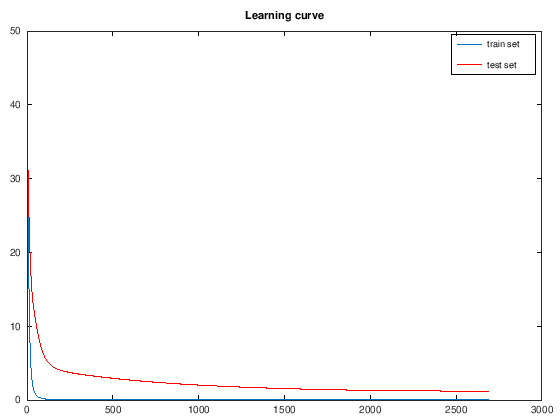

In [19]:
% learning curve
plot(mse_train_vec)
hold on
plot(mse_test_vec, 'r')
title('Learning curve')
legend('train set', 'test set')

In [20]:
% feedfoward ann evaluation
output = sum(X_train_bias' * W_out', 2);

In [21]:
% comparison of output and labels
[output, y_train, (y_train - output)]

ans =

  -0.6302897  -0.7875763  -0.1572865
  -0.7737887  -0.7875763  -0.0137876
   0.3799401   0.4507074   0.0707673
  -0.6841316  -0.7875763  -0.1034447
   0.1731459   0.4507074   0.2775615
   0.3759907   0.4507074   0.0747167
  -1.0647193  -0.7875763   0.2771431
  -0.5439304  -0.7875763  -0.2436459
   0.3624608   0.4507074   0.0882466
   0.6953391   0.4507074  -0.2446317
  -0.8654112  -0.7875763   0.0778349
  -0.6893780  -0.7875763  -0.0981983
   0.0232877   0.4507074   0.4274196
   0.6388023  -0.7875763  -1.4263785
   0.7002178   0.4507074  -0.2495105
  -0.6957750  -2.0258599  -1.3300848
  -1.0401278  -0.7875763   0.2525515
  -0.9165449  -0.7875763   0.1289686
  -1.0869226  -0.7875763   0.2993463
  -0.6272011  -0.7875763  -0.1603751
   0.9872360   0.4507074  -0.5365286
   0.5902385   0.4507074  -0.1395311
   1.3668059  -0.7875763  -2.1543821
  -0.0385007   0.4507074   0.4892081
  -0.8339047   0.4507074   1.2846121
  -1.1721827   0.4507074   1.6228900
   1.4798555  -0.7875763  -2.26

  -0.8471560   0.4507074   1.2978633
  -0.2817199   0.4507074   0.7324272
   0.1008567   1.6889910   1.5881342
   0.1150451   0.4507074   0.3356622
   2.7737717   0.4507074  -2.3230643
  -0.0487518  -0.7875763  -0.7388244
   0.1393621   0.4507074   0.3113453
  -0.1744599  -0.7875763  -0.6131164
   0.7624606   0.4507074  -0.3117532
  -1.2990999  -0.7875763   0.5115236
   1.1749407   0.4507074  -0.7242333
  -0.1326786  -0.7875763  -0.6548976
  -0.0516995   1.6889910   1.7406905
  -0.1396252   1.6889910   1.8286162
   0.9324674   0.4507074  -0.4817601
  -0.7445064   0.4507074   1.1952138
  -1.5038258   0.4507074   1.9545332
   0.1326553  -0.7875763  -0.9202315
   0.0598084  -0.7875763  -0.8473846
  -1.7809696   0.4507074   2.2316769
  -0.0680678   1.6889910   1.7570587
  -0.4501971  -0.7875763  -0.3373792
  -0.8659697   0.4507074   1.3166771
  -0.5982905   0.4507074   1.0489978
  -0.7008777  -0.7875763  -0.0866986
  -0.3994676  -0.7875763  -0.3881087
  -0.2496125   0.4507074   0.7003198
 

  -1.5515044  -0.7875763   0.7639282
  -0.5057754  -0.7875763  -0.2818008
  -1.0850634  -0.7875763   0.2974872
  -0.4982414   0.4507074   0.9489488
  -0.1949528   0.4507074   0.6456602
  -0.8627239   0.4507074   1.3134313
  -1.2320696  -0.7875763   0.4444933
   1.0673243   0.4507074  -0.6166170
   0.2616212   0.4507074   0.1890862
  -0.8406349   0.4507074   1.2913423
  -0.2962403   0.4507074   0.7469477
  -0.7326359  -0.7875763  -0.0549403
   0.0983933  -0.7875763  -0.8859695
  -0.8554471   1.6889910   2.5444381
  -0.8076634   0.4507074   1.2583707
   1.2915847   0.4507074  -0.8408773
  -1.0663006  -0.7875763   0.2787243
  -0.3510855  -0.7875763  -0.4364907
  -1.4602557   2.9272746   4.3875303
   1.9434144   0.4507074  -1.4927071
   0.3347595  -0.7875763  -1.1223358
   1.7754044   1.6889910  -0.0864135
  -0.6041471  -0.7875763  -0.1834291
   2.1030423   2.9272746   0.8242323
  -0.9473052  -0.7875763   0.1597289
   0.1242222  -2.0258599  -2.1500821
  -1.2614100  -0.7875763   0.4738338
 

  -1.5310634  -0.7875763   0.7434872
  -0.5135051  -0.7875763  -0.2740712
   0.6241804   0.4507074  -0.1734730
   1.7952818  -0.7875763  -2.5828580
  -0.9967579  -0.7875763   0.2091816
  -0.2576969  -0.7875763  -0.5298793
   1.2377935   1.6889910   0.4511975
   1.0425013   0.4507074  -0.5917939
  -0.0332803   1.6889910   1.7222712
  -0.5199660   0.4507074   0.9706734
  -0.2566909   0.4507074   0.7073982
   1.9081930  -0.7875763  -2.6957692
   0.0411811   1.6889910   1.6478099
  -0.3051190   0.4507074   0.7558264
  -1.1410609  -0.7875763   0.3534847
  -0.4016199  -0.7875763  -0.3859564
  -0.7101319   0.4507074   1.1608392
  -1.4458611   0.4507074   1.8965685
  -0.5152465   0.4507074   0.9659538
   2.0957357  -0.7875763  -2.8833120
  -0.4116324  -0.7875763  -0.3759438
  -1.2856526   0.4507074   1.7363599
   1.5216838  -0.7875763  -2.3092601
  -0.1448294  -0.7875763  -0.6427469
   0.6699245  -0.7875763  -1.4575008
   0.6200438   1.6889910   1.0689472
  -0.8776878   0.4507074   1.3283951
 

   1.2783354   0.4507074  -0.8276281
   1.3338909   0.4507074  -0.8831835
  -1.6054370   0.4507074   2.0561444
  -2.2699019   0.4507074   2.7206092
  -2.2413228   0.4507074   2.6920302
  -0.6839032   0.4507074   1.1346106
  -1.7433445   0.4507074   2.1940518
   0.6496129  -2.0258599  -2.6754728
  -0.4834635   0.4507074   0.9341709
   1.0591338  -0.7875763  -1.8467100
  -2.3006116  -0.7875763   1.5130353
   0.4068006  -2.0258599  -2.4326605
   1.8401846   0.4507074  -1.3894772
  -1.4134554   0.4507074   1.8641628
   2.0957357  -0.7875763  -2.8833120
   1.0013295   0.4507074  -0.5506222
  -1.0777834   0.4507074   1.5284907
  -0.6745380  -0.7875763  -0.1130383
  -0.8317752   0.4507074   1.2824826
  -0.2171953   0.4507074   0.6679026
   1.3882864   0.4507074  -0.9375791
  -0.3202834  -0.7875763  -0.4672929
  -0.9177888   0.4507074   1.3684961
   1.2503873   1.6889910   0.4386037
  -0.7514234  -0.7875763  -0.0361528
  -0.0097552  -0.7875763  -0.7778210
  -0.5017813   1.6889910   2.1907722
 

  -0.9566072  -0.7875763   0.1690310
   0.0701758  -0.7875763  -0.8577520
  -0.9848228  -0.7875763   0.1972466
   0.5510191  -0.7875763  -1.3385954
  -0.5497639  -0.7875763  -0.2378123
   0.6780228   0.4507074  -0.2273154
  -1.2569748   0.4507074   1.7076821
  -0.3397123  -0.7875763  -0.4478639
   0.4004520   0.4507074   0.0502554



neurons_hidden_layer =  1
iter_min =  143
mse_min =  0.86385
neurons_hidden_layer =  2
iter_min =  96
mse_min =  1.3395
neurons_hidden_layer =  3
iter_min =  2948
mse_min =  1.2173
neurons_hidden_layer =  5
iter_min =  2736
mse_min =  1.2675
neurons_hidden_layer =  10
iter_min =  2665
mse_min =  1.2002
neurons_hidden_layer =  30
iter_min =  2767
mse_min =  1.8660


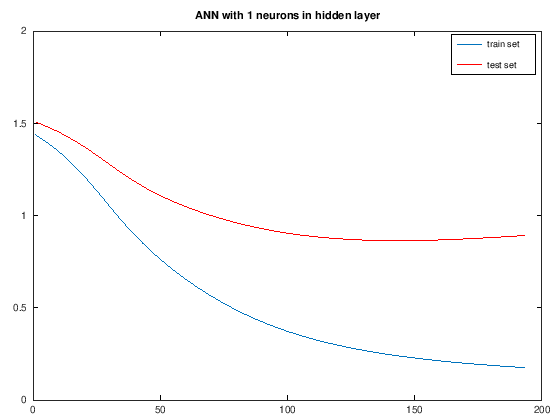

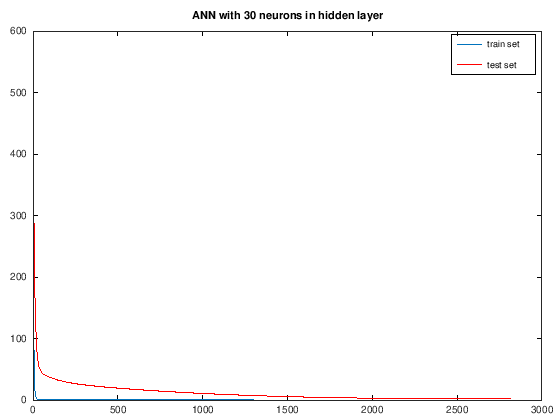

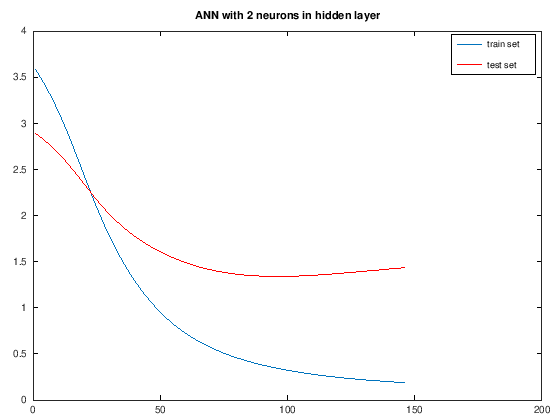

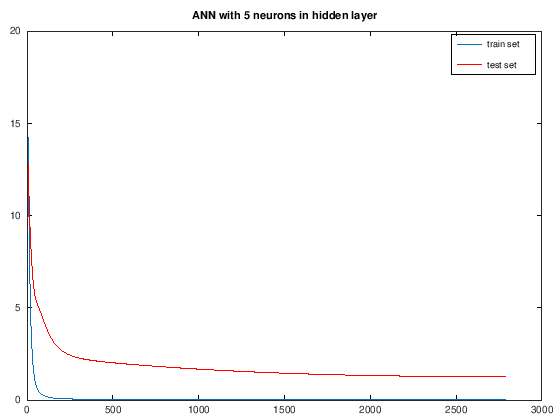

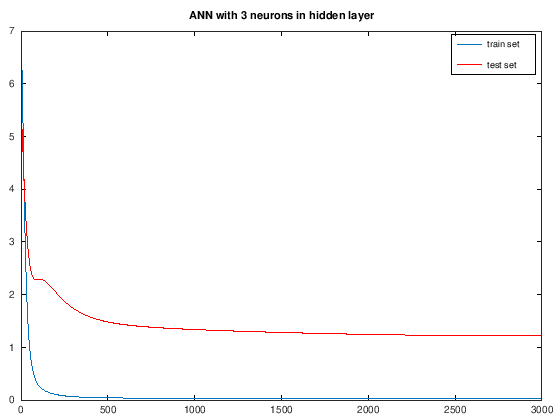

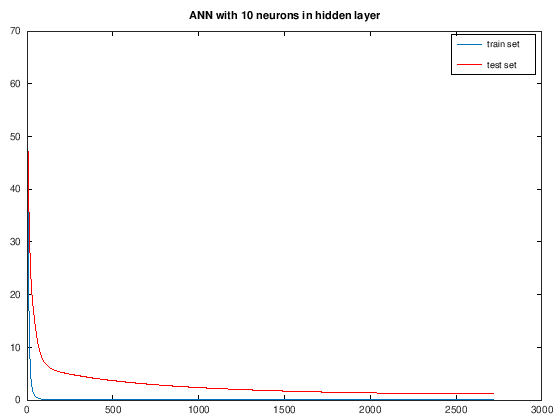

In [22]:
i = 1;
W_out = [];

% comparison of number of neurons in hidden layer
for O = [1, 2, 3, 5, 10, 30],
    
    neurons_hidden_layer = O
    
    W = rand([O N]).*0.01;
    W_to_store = zeros(size(W));
    W_bias = [ones(size(W,1),1), W];
    
    [W_to_store, mse_train_vec, mse_test_vec] = batch_backpropagation(X_test_bias, X_train_bias, y_test, y_train, W_bias, alpha, epsilon, gamma, 0, max_iter);
    W_out = [W_out; W_to_store];
    
    % learning curve
    figure(i)
    plot(mse_train_vec)
    hold on
    plot(mse_test_vec, 'r')
    title(['ANN with ' num2str(O) ' neurons in hidden layer'])
    legend('train set', 'test set')
    
    i = i+1;
    
end